# Analytics
The notebook will be used to clean, transform, analyze and visualize the data

# Libraries

In [542]:
import requests
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from pandasql import sqldf

# Load from files

In [543]:
dfLeaguesCSV = pd.read_csv('raw_data/leagues.csv')
dfTeamsCSV = pd.read_csv('raw_data/teams.csv')

# Initialize empty data frames
dfPlayersCSV = pd.DataFrame()
dfPlayerStatsCSV = pd.DataFrame()

# Load all players files
for name in glob.glob('raw_data/players_*.csv'):
    dfPlayersTemp = pd.read_csv(name)
    dfPlayersCSV = pd.concat([dfPlayersCSV, dfPlayersTemp])
    
# Load all player stats files
for name in glob.glob('raw_data/player_stats_*.csv'):
    dfPlayerStatsTemp = pd.read_csv(name)
    dfPlayerStatsCSV = pd.concat([dfPlayerStatsCSV, dfPlayerStatsTemp])

## Columns description

## Shape

# Clean and transform

## Join all data frames
There are several data frames. To perform analysis and build models we need to have just one. Hence we need to combine them.

In [544]:
# Merge players and player stats data sets
dfFootballCSV = dfPlayersCSV.merge(dfPlayerStatsCSV, left_on=['player_id','league_id','season_id'],\
                             right_on=['player_id','league_id','season_id'])

# Merge the result and teams data sets
dfFootballCSV = dfFootballCSV.merge(dfTeamsCSV, left_on=['team_id','league_id','season_id'],\
                             right_on=['team_id','league_id','season_id'])

# Merge the result and leagues data sets
dfFootballCSV = dfFootballCSV.merge(dfLeaguesCSV, left_on='league_id',\
                             right_on='league_id')

## Initial analysis

Sample

In [545]:
# You can change the index in the .iloc to see more columns
dfFootballCSV.iloc[:,0:].sample(5)

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,...,venue_city,venue_capacity,venue_surface,venue_image,league_name_y,league_type,league_logo_y,country_name,country_code,country_flag
10009,2920,T. Castagne,Timothy,Castagne,28.0,1995-12-05,Arlon,Belgium,Belgium,185 cm,...,Genk,24956,grass,https://media-3.api-sports.io/football/venues/...,Jupiler Pro League,League,https://media-3.api-sports.io/football/leagues...,Belgium,BE,https://media-3.api-sports.io/flags/be.svg
50698,47553,Bebé,Tiago Manuel,Dias Correia,33.0,1990-07-12,Agualva-Cacém,Portugal,Cape Verde,190 cm,...,Eibar,8050,grass,https://media-1.api-sports.io/football/venues/...,La Liga,League,https://media-2.api-sports.io/football/leagues...,Spain,ES,https://media-2.api-sports.io/flags/es.svg
32446,31746,M. Tumminello,Marco,Tumminello,25.0,1998-11-06,Erice,Italy,Italy,180 cm,...,Roma,68530,grass,https://media-2.api-sports.io/football/venues/...,Serie A,League,https://media-1.api-sports.io/football/leagues...,Italy,IT,https://media-1.api-sports.io/flags/it.svg
45508,3450,Frédéric Mendy,Frédéric,Mendy,35.0,1988-09-18,Évreux,France,Guinea-Bissau,193 cm,...,Estoril,8015,grass,https://media-2.api-sports.io/football/venues/...,Primeira Liga,League,https://media-2.api-sports.io/football/leagues...,Portugal,PT,https://media-1.api-sports.io/flags/pt.svg
21606,24835,B. Tekpetey,Bernard,Tekpetey,26.0,1997-09-03,Accra,Ghana,Ghana,172 cm,...,Gelsenkirchen,62271,grass,https://media-3.api-sports.io/football/venues/...,Bundesliga,League,https://media-3.api-sports.io/football/leagues...,Germany,DE,https://media-1.api-sports.io/flags/de.svg


Shape

In [546]:
dfFootballCSV.shape

(65880, 79)

Statistical info

In [547]:
dfFootballCSV.iloc[:,10:].describe(include='all')

,player_weight,player_injured,player_photo,league_id,season_id,team_id,team_name_x,team_logo_x,league_name_x,league_country,...,venue_city,venue_capacity,venue_surface,venue_image,league_name_y,league_type,league_logo_y,country_name,country_code,country_flag
count,60662,65880,65880,65880.000000,65880.000000,65880.000000,65880,65880,65880,65880,...,65813,65880.000000,65880,65880,65880,65880,65880,65880,65880,65880
unique,60,1,36247,NaN,NaN,NaN,309,927,9,10,...,262,NaN,2,702,9,1,10,10,10,10
top,75 kg,False,https://media-2.api-sports.io/football/players...,NaN,NaN,NaN,Genoa,https://media-1.api-sports.io/football/teams/4...,Premier League,Italy,...,London,NaN,grass,https://media-1.api-sports.io/football/venues/...,Premier League,League,https://media-1.api-sports.io/football/leagues...,Italy,IT,https://media-1.api-sports.io/flags/it.svg
freq,4225,65880,10,NaN,NaN,NaN,445,166,12583,8134,...,2030,NaN,63144,362,12583,65880,8134,8134,8134,8134
mean,NaN,NaN,NaN,127.894520,2016.676988,778.168139,NaN,NaN,NaN,NaN,...,NaN,32831.787993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,76.751904,2.903405,1677.066797,NaN,NaN,NaN,NaN,...,NaN,19550.811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,2012.000000,33.000000,NaN,NaN,NaN,NaN,...,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,78.000000,2014.000000,167.000000,NaN,NaN,NaN,NaN,...,NaN,17319.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,135.000000,2017.000000,489.000000,NaN,NaN,NaN,NaN,...,NaN,29062.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,144.000000,2019.000000,631.000000,NaN,NaN,NaN,NaN,...,NaN,43147.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop columns

In [548]:
# With all NA records
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[dfFootballCSV.isna().all()].to_list(), axis=1)

# With all False records
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[(dfFootballCSV == False).all()].to_list(), axis=1)

# All values the same
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[dfFootballCSV.nunique() == 1].to_list(), axis=1)

## Null values

Get all columns containing null values

In [629]:
dfFootballCSV.columns[dfFootballCSV.isna().any()].to_list()

['player_birth_place',
 'player_height',
 'player_weight',
 'games_position',
 'games_rating',
 'team_code',
 'venue_address']

Fix

In [550]:
# Drop where no player name
dfFootballCSV = dfFootballCSV[~dfFootballCSV['player_name'].isna()]

# Drop where no birthdate/age
dfFootballCSV = dfFootballCSV[~dfFootballCSV['player_age'].isna()]

# Fill numneric columns with 0
dfFootballCSV[['games_appearences','games_lineups','games_minutes','substitutes_in','substitutes_out',\
    'substitutes_bench','shots_total','shots_on','goals_total','goals_conceded','goals_assists','goals_saves','passes_total',\
    'passes_key','passes_accuracy','tackles_total','tackles_blocks','tackles_interceptions','duels_total','duels_won',\
    'dribbles_attempts','dribbles_success','fouls_drawn','fouls_committed','cards_yellow','cards_yellowred','cards_red',\
    'penalty_won','penalty_commited','penalty_scored','penalty_missed','penalty_saved']]\
= dfFootballCSV[['games_appearences','games_lineups','games_minutes','substitutes_in','substitutes_out',\
    'substitutes_bench','shots_total','shots_on','goals_total','goals_conceded','goals_assists','goals_saves','passes_total',\
    'passes_key','passes_accuracy','tackles_total','tackles_blocks','tackles_interceptions','duels_total','duels_won',\
    'dribbles_attempts','dribbles_success','fouls_drawn','fouls_committed','cards_yellow','cards_yellowred','cards_red',\
    'penalty_won','penalty_commited','penalty_scored','penalty_missed','penalty_saved']].fillna(0)

# Populate missing venue_city
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Beerschot', 'venue_city'] = 'Antwerp'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Kryvbas', 'venue_city'] = 'Kryvyi Rih'

# Populate missing team_founded
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Tondela', 'team_founded'] = '1933'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Moreirense', 'team_founded'] = '1938'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'U. Madeira', 'team_founded'] = '1913'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Rukh Vynnyky', 'team_founded'] = '2003'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Kolos Kovalivka', 'team_founded'] = '2012'
dfFootballCSV.loc[dfFootballCSV.team_name_x == 'Fatih Karagümrük', 'team_founded'] = '1926'

In [628]:
team_code

In [620]:
dfFootballCSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65867 entries, 0 to 65879
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              65867 non-null  int64  
 1   player_name            65867 non-null  object 
 2   player_firstname       65867 non-null  object 
 3   player_lastname        65867 non-null  object 
 4   player_age             65867 non-null  float64
 5   player_birth_date      65867 non-null  object 
 6   player_birth_place     61113 non-null  object 
 7   player_birth_country   65867 non-null  object 
 8   player_nationality     65867 non-null  object 
 9   player_height          63635 non-null  object 
 10  player_weight          60662 non-null  object 
 11  player_photo           65867 non-null  object 
 12  league_id              65867 non-null  int64  
 13  season_id              65867 non-null  int64  
 14  team_id                65867 non-null  int64  
 15  te

In [484]:
dfFootballCSV.sample(5).groupby(['player_id','team_id','season_id','league_id']).sum()

,,,,player_age,player_injured,league_season,games_appearences,games_lineups,games_minutes,games_number,games_rating,games_captain,substitutes_in,...,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,team_founded,team_national,venue_id,venue_capacity
player_id,team_id,season_id,league_id,,,,,,,,,,,,,,,,,,,,,
513,157,2018,78,26.0,0,2018,17.0,4.0,567.0,0.0,6.746666,0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,0,700,75000
1636,495,2013,135,32.0,0,2013,25.0,23.0,1962.0,0.0,0.000000,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1893.0,0,905,36703
18884,35,2015,39,25.0,0,2015,0.0,0.0,0.0,0.0,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1899.0,0,504,12000
22235,1063,2017,61,27.0,0,2017,34.0,27.0,2569.0,0.0,6.964705,0,7.0,...,0.0,2.0,0.0,4.0,0.0,0.0,1920.0,0,676,41965
30535,498,2021,135,28.0,0,2021,11.0,10.0,761.0,0.0,6.622222,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1946.0,0,905,36703


## Define data frame for machine learning and analytics

### Drop the fields not relevant to machine learning

- **player_name, player_firstname, player_lastname, player_photo, team_logo_x, league_flag, country_flag, league_logo_x, league_logo_y, team_logo_y, venue_image** - not relevant
- **player_birth_date** - can be calculated based on player_age
- **team_name_x, team_name_y, team_code** - represents the same data as team_id
- **league_name_x, league_country, team_country, league_name_y, country_name, country_code** - represents the same data as league_id
- **venue_name, venue_address** - represents the same data as venue_id
- **league_season** - represents the same data as league_id

In [428]:
dfFootballML = dfFootballCSV.drop(['player_name','player_firstname','player_lastname','player_birth_date','player_injured',\
    'player_photo','team_name_x','team_logo_x','league_name_x','league_country','league_logo_x','league_flag','games_number',\
    'games_captain','dribbles_past','team_name_y','team_code','team_country','team_national','team_logo_y','venue_name',\
    'venue_address','venue_image','league_name_y','league_type','league_logo_y','country_flag','country_name','country_code',\
    'league_season'], axis=1)

### Drop the fields not relevant to analysis
- **player_id, league_id, team_id, venue_id** - id field
- **player_firstname, player_lastname** - combination returns player_name
- **player_photo, team_logo_x, league_flag, country_flag, league_logo_x, league_logo_y, team_logo_y, venue_image** - not relevant
- **league_season** - represents the same data as league_id
- **team_name_y, league_name_y** - duplicate

In [429]:
dfLeaguesA = dfFootballCSV.drop(['player_id','player_firstname','player_lastname','player_photo','team_logo_x','league_flag',\
    'country_flag','league_logo_x','league_logo_y','team_logo_y','venue_image','player_injured','games_captain','team_national',\
    'games_number','dribbles_past','league_type','league_id','team_id','league_season','team_name_y','venue_id','league_name_y'\
    ], axis=1)

## Duplicates

Duplicated records are cauased by several tournaments, we just need to combine them

In [436]:
dfFootballML[dfFootballML.duplicated()]

# dfFootballML = dfFootballML.drop_duplicates()

,player_id,player_age,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,league_id,season_id,team_id,...,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,team_founded,venue_id,venue_city,venue_capacity,venue_surface
2604,3347,28.0,Bamako,Mali,Mali,177 cm,74 kg,61,2019,112,...,NaN,NaN,NaN,NaN,NaN,1932.0,658,Longeville-lès-Metz,30000,grass
4913,62337,37.0,Yaoundé,Cameroon,Cameroon,185 cm,79 kg,61,2015,110,...,NaN,NaN,NaN,NaN,NaN,1986.0,684,Troyes,21877,grass
6815,319511,21.0,NaN,Belgium,Belgium,174 cm,NaN,144,2021,733,...,NaN,NaN,NaN,NaN,NaN,1898.0,192,Luik,27670,grass
7112,47989,28.0,Malmö,Sweden,Sweden,180 cm,69 kg,144,2021,266,...,NaN,NaN,NaN,NaN,NaN,1904.0,185,Malines,16715,grass
7499,119115,23.0,NaN,Belgium,Belgium,170 cm,NaN,144,2021,554,...,NaN,NaN,NaN,NaN,NaN,1908.0,174,Brussel,28063,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64852,50037,36.0,Niğde,Türkiye,Türkiye,181 cm,80 kg,203,2012,1001,...,NaN,NaN,NaN,NaN,NaN,1966.0,19613,Kayseri,40458,grass
65071,245240,33.0,Denizli,Turkey,Turkey,190 cm,92 kg,203,2012,1003,...,NaN,NaN,NaN,NaN,NaN,1963.0,12278,Bursa,45000,grass
65447,50178,35.0,Gondomar,Portugal,Portugal,181 cm,76 kg,203,2013,1004,...,NaN,NaN,NaN,NaN,NaN,1921.0,1585,İstanbul,14234,grass
65453,214946,25.0,Elazig,Turkey,Turkey,NaN,NaN,203,2013,3571,...,NaN,NaN,NaN,NaN,NaN,1967.0,2373,Elaziğ,13923,grass


In [385]:
df1 = dfFootballML.groupby(['player_id','team_id','season_id','league_id'])['venue_id'].count().reset_index()

df1[df1['venue_id'] > 1]

,player_id,team_id,season_id,league_id,venue_id
123,17,165,2018,78,2
305,42,242,2021,94,2
531,74,504,2019,135,2
1894,256,529,2021,140,2
1904,257,497,2012,135,2
...,...,...,...,...,...
63030,237129,112,2021,61,2
63206,241501,13248,2012,333,2
64055,275542,3623,2020,333,2
64804,306196,6501,2021,333,2


In [419]:
df2 = dfFootballML[(dfFootballML['player_id'] == 257) & (dfFootballML['team_id'] == 497) & (dfFootballML['season_id'] == 2012)]\
.iloc[:,0:]

df2[['player_id','team_id','season_id','league_id','games_appearences','games_lineups','games_minutes',\
'substitutes_in','substitutes_out','substitutes_bench','goals_total','cards_yellow']]



,player_id,team_id,season_id,league_id,games_appearences,games_lineups,games_minutes,substitutes_in,substitutes_out,substitutes_bench,goals_total,cards_yellow
33318,257,497,2012,135,10.0,9.0,825.0,1.0,0.0,3.0,0.0,0.0
33319,257,497,2012,135,16.0,13.0,1262.0,3.0,0.0,6.0,0.0,1.0


In [420]:
dfPlayersCSV[dfPlayersCSV['player_id'] == 257]

# dfPlayerStatsCSV[(dfPlayerStatsCSV['player_id'] == 42) & (dfPlayerStatsCSV['season_id'] == 2021)]

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,player_injured,player_photo,league_id,season_id
380,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-1.api-sports.io/football/players...,61,2021
422,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-1.api-sports.io/football/players...,61,2020
421,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-2.api-sports.io/football/players...,61,2018
380,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-2.api-sports.io/football/players...,61,2019
441,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-1.api-sports.io/football/players...,61,2017
460,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-3.api-sports.io/football/players...,61,2016
480,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-3.api-sports.io/football/players...,61,2014
501,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-2.api-sports.io/football/players...,61,2015
2810,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-2.api-sports.io/football/players...,135,2012
461,257,Marquinhos,Marcos,Aoás Corrêa,29.0,1994-05-14,São Paulo,Brazil,Brazil,183 cm,75 kg,False,https://media-3.api-sports.io/football/players...,61,2013


## rename _x and _y columns

## remove cm from player_height

## remove kg from player_weight

## Data types

## Min/Max values

## Distribution numeric

## Distribution categorical

## Correlation

## Relationship between categorical and numerical columns

## Distribution of number of teams in leagues for all seasons
It allows us to check if there are any issues with the data. The number of teams in any league and season should be between 10 and 25. The majority of leagues have 18-20 teams.

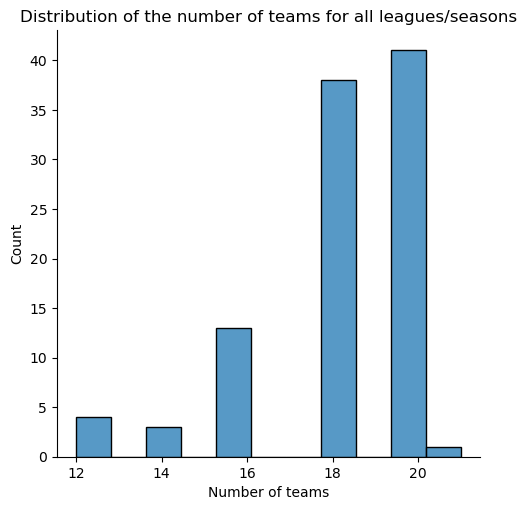

In [194]:
# Group by country and season
sns.displot(dfFootballCSV.groupby(['league_id','season_id'])['team_id'].nunique())\
    .set(xlabel='Number of teams', title='Distribution of the number of teams for all leagues/seasons')

The result is exactly as described above.

## Distribution of players in teams

## Distribution of players/teams in leagues

## Distribution of players/teams/leagues in seasons

## Check if venue_id is unique for each team_id, if majory yes then remove that field
and venue_city vs venue_id

## Remove players missing in teams

In [47]:
sql = '''
SELECT *
FROM dfPlayerStats 
WHERE team_id NOT IN (select team_id from dfTeams)
'''

sqldf(sql)

,team_id,team_name,team_logo,league_id,league_name,league_country,league_logo,league_flag,league_season,games_appearences,...,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,player_id,league_id.1,season_id
0,9256,Olympique Lyonnais II,https://media-2.api-sports.io/football/teams/9...,61,Ligue 1,France,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/fr.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,670,61,2021
1,4715,Excelsior Virton,https://media-3.api-sports.io/football/teams/4...,144,Jupiler Pro League,Belgium,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/be.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,163034,144,2021
2,1353,Swindon Town,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,17968,39,2021
3,1342,Walsall,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,157025,39,2021
4,1353,Swindon Town,https://media-1.api-sports.io/football/teams/1...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,348463,39,2021
5,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,1735,39,2021
6,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,15430,39,2021
7,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,20220,39,2021
8,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45204,39,2021
9,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45285,39,2021


## The same players in players and player_stats

In [53]:
sql = '''
SELECT COUNT(DISTINCT player_id) "Number of players", 'Players' source
FROM dfPlayers 
UNION ALL
SELECT COUNT(DISTINCT player_id) "Number of players", 'Player stats' source
FROM dfPlayerStats
'''

sqldf(sql)

,Number of players,source
0,7123,Players
1,7123,Player stats


## Remove highly correlated features

## Add the same set of features for each player but grouped for the team

# Other

In [137]:
sql = '''
select distinct team_id
from dfFootball 
'''

sql = '''
select distinct player_birth_country
from dfPlayersCSV 
'''



sqldf(sql)

,player_birth_country
0,Greece
1,France
2,Mali
3,Brazil
4,Cameroon
...,...
169,Bosnia-Herzegovina
170,CÃ´te d'Ivoire
171,Montserrat
172,St. Lucia


In [352]:
dfFootballML.iloc[:,46:]

,venue_id,venue_city,venue_capacity,venue_surface
0,19207,Villeneuve d&apos;Ascq,50083,grass
1,19207,Villeneuve d&apos;Ascq,50083,grass
2,19207,Villeneuve d&apos;Ascq,50083,grass
3,19207,Villeneuve d&apos;Ascq,50083,grass
4,19207,Villeneuve d&apos;Ascq,50083,grass
...,...,...,...,...
65875,1574,Akhisar,12139,grass
65876,1574,Akhisar,12139,grass
65877,1574,Akhisar,12139,grass
65878,1574,Akhisar,12139,grass
